## SYSTEMIQ Test
### Candidate: Andres Barberan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None

### Question Block A: Data cleaning & merging

#### Question 1.a & b
Please load the users and activity tables into Python.
- How many variables are in the datasets?
- How many observations are in the datasets?

##### Create dataframes with data on csv files

In [2]:
#Import csv files as dataframes
users_df=pd.read_csv('SIQ_data_test/users.csv')
activities_df=pd.read_csv('SIQ_data_test/activities.csv')

##### Explore users_df dataframe

In [3]:
#Number of variables
len(users_df.columns)

5

In [4]:
#Number of observations by variable
users_df.count()

UserId     5807
Country    5807
DOB        5807
Gender     5807
RegDate    5807
dtype: int64

In [5]:
users_df.replace(' ', np.nan, inplace=True) 
users_df.isna().sum()

UserId        0
Country       0
DOB           0
Gender     1481
RegDate       0
dtype: int64

##### Explore activities_df dataframe

In [6]:
#Number of variables
len(activities_df.columns)

3

In [7]:
#Number of observations by variable
activities_df.count()

UserId     22642
Date       22642
Revenue    22642
dtype: int64

In [8]:
activities_df.replace(' ', np.nan, inplace=True) 
activities_df.isna().sum()

UserId     0
Date       0
Revenue    0
dtype: int64

##### From results above: 
-  **users_df** table has 5 different variables, each containing 5807 observations. However, column 'Gender' has 1481 out of the 5807 rows that where blank.
- **activities_df** table has 3 different variables, each containing 22642 observations. There are no blanks rows in any of the columns.


#### Question 2.a, b & c

How many
- Male users are in the dataset?
- Female users are in the dataset?
- For how many users is no gender information available?

In [9]:
users_df['Gender'].replace(np.nan,'No information', inplace=True) 
table = pd.pivot_table(data=users_df,index=['Gender'],aggfunc={'UserId':'nunique'})
table

,UserId
Gender,
F,1417
M,2909
No information,1481


##### From results above: 
-  There are **1417** women, **2909** men and **1481** users with no gender information available in the dataset.


#### Questions 3 and 4

- Merge the two datasets and calculate the days since registration for each activity. What is the total mean and median revenue generated per user (ie across all activities)? How do you interpret the result?
- Please visualise the distribution of the revenues by user.


I first merge the two dataframes using the column "UserId" as key. For this, I also consider the users with no gender information as Male.

In [10]:
users_df['Gender'].replace('No information','M', inplace=True) 
merged_df = pd.merge(activities_df, users_df, how="outer", on=["UserId"])
merged_df

,UserId,Date,Revenue,Country,DOB,Gender,RegDate
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24
...,...,...,...,...,...,...,...
22647,3228231,NaN,NaN,GB,1985-08-24,F,2016-12-26
22648,3248027,NaN,NaN,GB,1966-09-15,M,2017-04-27
22649,3330595,NaN,NaN,GB,1996-04-01,M,2017-05-05
22650,3341993,NaN,NaN,GB,1975-05-29,M,2017-03-20


I now calculate the days since registration for each activity. There are users that did not perform any activity since registering, so I will remove those for the next calculations.


In [11]:
merged_df=merged_df.dropna()
merged_df[['Date','RegDate']] = merged_df[['Date','RegDate']].apply(pd.to_datetime) #if conversion required
merged_df['days_since_reg'] = (merged_df['Date'] - merged_df['RegDate']).dt.days
merged_df.head()

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,days_since_reg
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,332
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,341
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,347
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,348
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,349


What is the total mean and median revenue generated per user (ie across all activities)?


In [12]:
total_revenue=round(merged_df['Revenue'].sum(),1)
print(f'Total revenue:{total_revenue}')
mean_revenue=round(merged_df['Revenue'].mean(),1)
print(f'Mean revenue:{mean_revenue}')
median_revenue=round(merged_df['Revenue'].median(),1)
print(f'Median revenue:{median_revenue}')

Total revenue:2972067.5
Mean revenue:131.3
Median revenue:40.0


The mean revenue for the whole data is more than three times higher that the median. This suggests that the data counts on outliers, that is, few users who generated a very high revenue in comparison to the rest during certain activities/times.

In [13]:
stats_merged_df = merged_df.groupby(['UserId'])['Revenue'].agg(['sum','mean','median'])
stats_merged_df.head(25)

,sum,mean,median
UserId,,,
1326865,351.42,18.495789,17.160
1333278,45.00,22.500000,22.500
1336967,20.00,20.000000,20.000
1339784,59.28,29.640000,29.640
1339829,17.05,17.050000,17.050
1346806,17.05,17.050000,17.050
1361182,100.00,20.000000,20.000
1392534,46.90,46.900000,46.900
1405503,43.21,21.605000,21.605


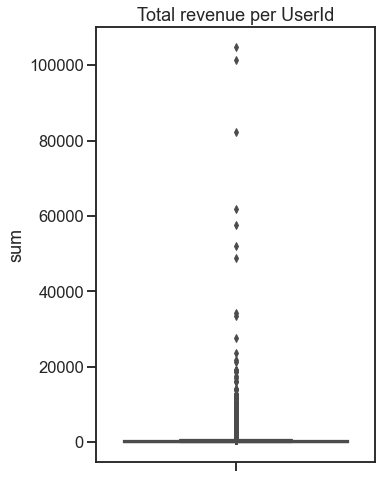

In [14]:
sns.set(rc={"figure.figsize": (5, 8)})
sns.set_style("ticks")
sns.set_context("talk")
sns.despine(bottom=False)
sns.boxplot(y=stats_merged_df['sum']).set_title('Total revenue per UserId')
plt.show()

We can confirm what was stated above about outliers, by taking a look at the box plot for the data.
Given this outliers, it is more convenient to visualize total revenue distribution in logaritmic scale, as shown on the histogram below.

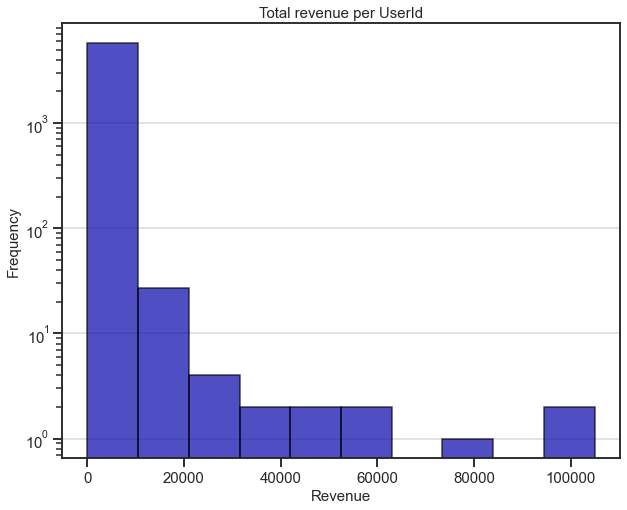

In [15]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=stats_merged_df['sum'], bins=10, color='#0504aa',alpha=0.7,log=True,edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Revenue',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Total revenue per UserId',fontsize=15)
plt.show()

#### Question 5
- What is the average week 1 revenue, ie the revenue generated by the user in their first week (ie within the first 7 days since registration)?


In [16]:
merged_df_first_week=merged_df[merged_df['days_since_reg']<7]
merged_df_first_week

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,days_since_reg
1642,3109386,2017-03-03,20.00,GB,1986-05-16,F,2017-02-26,5
1647,3114216,2017-01-29,29.19,Other,1978-09-02,M,2017-01-23,6
1652,3114891,2017-01-19,20.00,GB,1968-03-23,M,2017-01-16,3
1654,3115043,2016-10-22,17.05,US,1985-11-01,F,2016-10-17,5
1658,3115226,2016-12-04,25.00,GB,1967-07-04,M,2016-11-29,5
...,...,...,...,...,...,...,...,...
22633,3347222,2017-03-23,19.28,FR,1967-05-25,M,2017-03-22,1
22638,3347251,2017-04-03,30.00,GB,1981-06-11,F,2017-04-03,0
22639,3347333,2017-01-27,30.00,GB,1987-11-22,M,2017-01-27,0
22640,3347367,2017-04-04,17.05,US,1995-08-09,F,2017-04-04,0


In [17]:
total_revenue_first_week=round(merged_df_first_week['Revenue'].sum(),1)
print(f'Total revenue for the first week:{total_revenue_first_week}')
mean_revenue_first_week=round(merged_df_first_week['Revenue'].mean(),1)
print(f'Mean revenue for the first week:{mean_revenue_first_week}')
median_revenue_first_week=round(merged_df_first_week['Revenue'].median(),1)
print(f'Median revenue for the first week:{median_revenue_first_week}')

Total revenue for the first week:964290.7
Mean revenue for the first week:131.3
Median revenue for the first week:42.6


### Question Block B: Analytics

#### Question 6
- In this dataset men generated a higher week 1 revenue than women, on average.  Is this difference in revenue between men and women statistically significant? What is an appropriate statistical test to determine this and what is it’s p-value?

In order to determine wether the difference in means is statistically significant, p-value can be calculated using an appropriate test for the data.
As we could see in the previous data histogram, the data does not seem to have a normal distribution and for that reason, a T test could lead to non reliable results. For these type of distribution, a test called Mann-Whitney U Test can be applied, which does not make assumptions about the type of distribution of the data.
To apply this test, I first split the data in two dataframes: one corresponding to male and other corresponding to female observations.

In [18]:
revenue_df=merged_df_first_week[['Revenue','Gender','Country']]

In [19]:
revenue_df.groupby('Gender').describe()

Revenue                                                             
         count        mean         std    min   25%    50%     75%      max
Gender                                                                     
F       1769.0  112.653657  370.516334  11.23  20.0  40.00   93.79  10200.0
M       5576.0  137.196272  396.806924  11.23  20.0  42.63  100.00  11000.0

In [20]:
male_data=revenue_df[revenue_df['Gender']=='M']
female_data=revenue_df[revenue_df['Gender']=='F']

In [21]:
mwu_test=pg.mwu(x=male_data['Revenue'],y=female_data['Revenue'])
p_value=mwu_test['p-val']
p_value

MWU    0.000015
Name: p-val, dtype: float64

The p-value lowet that 0.05 indicates that the default assumption (H0: there is no difference between the distributions of the data samples) is rejected and we can say the the difference in the means is significant.

#### Question 7
- In which country is this difference biggest?

In [22]:
revenue_by_country=revenue_df.groupby(['Country','Gender']).describe()
revenue_by_country.reset_index()

Country Gender Revenue                                               \
                   count        mean         std    min    25%    50%   
0      DE      F   212.0   87.698019  165.910732  17.05  17.82  35.63   
1      DE      M   911.0  110.190044  232.796125  17.05  17.82  35.63   
2      FR      F   106.0  133.803396  195.276086  18.76  37.52  56.27   
3      FR      M   521.0  169.612649  382.089176  17.05  28.14  56.27   
4      GB      F   915.0  137.221082  486.828413  20.00  20.00  40.00   
5      GB      M  2413.0  147.662370  429.776743  18.68  20.00  50.00   
6   Other      F   222.0   63.176622  109.075265  11.23  17.05  25.58   
7   Other      M   733.0  104.133588  321.798850  11.23  17.05  25.58   
8      US      F   314.0   85.753758  197.036888  17.05  17.05  34.11   
9      US      M   998.0  143.903677  479.199368  17.05  21.32  42.63   

                       
        75%       max  
0   73.4950   1247.14  
1   89.0800   2859.51  
2  116.0675   1125.49  
3  187.5800   4258.11  
4  100.0000  10200.00  
5  107.7300  11000.00  
6   66.3500    980.56  
7   83.5600   4263.30  
8   75.6750   2174.28  
9   93.7900   9805.59

In [23]:
table = pd.pivot_table(data=revenue_df,index=['Country'],columns=['Gender'],aggfunc={'Revenue':np.mean})
table.columns = [col[1] for col in table.columns]
table['Delta_avg_revenue']=table['M']-table['F']
table

,F,M,Delta_avg_revenue
Country,,,
DE,87.698019,110.190044,22.492025
FR,133.803396,169.612649,35.809253
GB,137.221082,147.662370,10.441289
Other,63.176622,104.133588,40.956966
US,85.753758,143.903677,58.149919


As shown on the table above, the greatest difference in average revenue between's male and female users appears for the US, for revenue generated during the first 7 days.

#### Question 8
- Please visualise the relationship between country, gender and week 1 revenue with an appropriate chart.

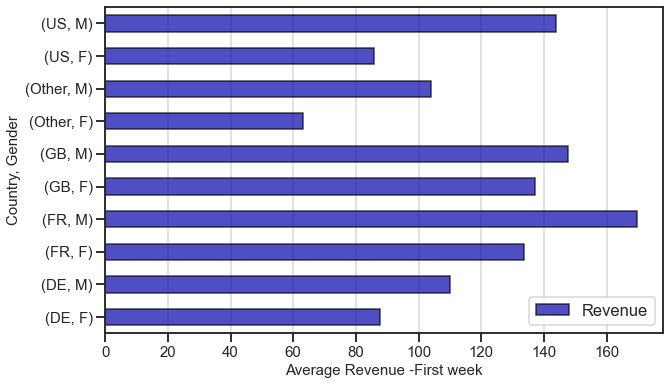

In [24]:
plt.rcParams["figure.figsize"] = [10, 6]
revenue_by_country=revenue_df.groupby(['Country','Gender']).mean().plot(kind = "barh", label='index',edgecolor='black',color='#0504aa',alpha=0.7)
plt.xlabel("Average Revenue -First week",fontsize=15)
plt.ylabel("Country, Gender",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='x', alpha=0.75)

This plot confirms that the difference between average revenue of males and females users is the greatest in the US.

#### Question 9
- Build a linear regression model to predict the week 1 revenue of a user based on the following variables: Gender, Age, Country and day 1 revenue (ie the revenue generated by the user on their registration date). Which of these variables have a statistically significant predictive power according to this model?

In [25]:
# Create dataframe with variables that will be used to fit regression model
regression_df=pd.DataFrame()
#Calculate Week 1 revenue for each UserId
regression_df['First_week_revenue']=merged_df_first_week.groupby(['UserId'])['Revenue'].sum()

#Calculate First revenue for each UserId
regression_df['First_day_revenue']=(merged_df_first_week[merged_df_first_week['days_since_reg']==0]).groupby(['UserId'])['Revenue'].sum()

#Users that did not generate revenue on their first day, are considered to having generated 0 units revenue.
regression_df.replace(np.nan,0, inplace=True)
regression_df.reset_index()

#Create dataframe with UserId, Country, DOB and Gender and RegDate
add_data_df=merged_df_first_week[['UserId','Country','DOB','Gender','RegDate']]
#Create a column with the age at the registration day
add_data_df[['DOB','RegDate']] = add_data_df[['DOB','RegDate']].apply(pd.to_datetime) 
add_data_df['Age_at_reg']=(((add_data_df['RegDate'] - add_data_df['DOB']).dt.days)/365).astype(int)
add_data_df=add_data_df.drop_duplicates('UserId')

#Merge regression_df with add_data_df to get Country, Gender and Age data
regression_df = regression_df.merge(add_data_df,how="left", on=['UserId'])
regression_df=regression_df[['Gender','Age_at_reg','Country','First_day_revenue','First_week_revenue']]
regression_df

,Gender,Age_at_reg,Country,First_day_revenue,First_week_revenue
0,F,30,GB,0.00,20.00
1,M,38,Other,0.00,29.19
2,M,48,GB,0.00,20.00
3,F,30,US,0.00,17.05
4,M,49,GB,0.00,25.00
...,...,...,...,...,...
5084,M,49,FR,37.52,56.80
5085,F,35,GB,30.00,30.00
5086,M,29,GB,30.00,30.00
5087,F,21,US,17.05,17.05


In [26]:
#Convert Country and Gender variables from categorical to numerical code
categories_country=regression_df['Country'].astype('category').cat.categories
regression_df['Country']=regression_df['Country'].astype('category').cat.codes
categories_gender=regression_df['Gender'].astype('category').cat.categories
regression_df['Gender']=regression_df['Gender'].astype('category').cat.codes


#Fit Linear regression model
X=regression_df.drop('First_week_revenue',axis='columns')
y=regression_df['First_week_revenue']

lr = LinearRegression()
lr.fit(X,y)

#Retrieve variables coefficients
coeff_parameter = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Gender,1.123949
Age_at_reg,1.013736
Country,-0.092875
First_day_revenue,1.342086


From coefficients above, we can see that the most significant variable for revenue in week 1 is how much the revenue on the first day was, followed by the gender.

#### Question 10
- What revenues do you expect women from France, Germany and the UK to generate, assuming they are all aged 40 and all generated £20 on their registration day?

In [27]:
print(categories_country)
print(categories_gender)

Index(['DE', 'FR', 'GB', 'Other', 'US'], dtype='object')
Index(['F', 'M'], dtype='object')


In [43]:
#Three vectors will be created, cointaining the Gender, Country and revenue on the first day
woman_1=[0,40,1,20]
woman_2=[0,40,0,20]
woman_3=[0,40,2,20]

revenue_woman1=lr.predict([woman_1])
revenue_woman2=lr.predict([woman_2])
revenue_woman3=lr.predict([woman_3])

print(f'First week revenue for a woman from France, aged 40 and that generated 20 pounds on her first day will be: {revenue_woman1[0].round(1)}.\nFirst week revenue for a woman from Germany, aged 40 and that generated 20 pounds on her first day will be: {revenue_woman2[0].round(1)}.\nFirst week revenue for a woman from the UK, aged 40 and that generated 20 pounds on her first day will be: {revenue_woman3[0].round(1)}')

First week revenue for a woman from France, aged 40 and that generated 20 pounds on her first day will be: 73.9.
First week revenue for a woman from Germany, aged 40 and that generated 20 pounds on her first day will be: 74.0.
First week revenue for a woman from the UK, aged 40 and that generated 20 pounds on her first day will be: 73.8


We can see that the First week revenue is very similar for all three women, which makes sense given that the variables that have the highest influence on First Week Revenue stay the same for all three of them